<a href="https://colab.research.google.com/github/Aggeliki-Mentzini/Home-Credit-Default-Risk-Kaggle/blob/main/main_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
import sys
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from  sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import missingno as msno

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving application_test.csv to application_test.csv


In [ ]:
application_test = pd.read_csv('application_test.csv')


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving application_train.csv to application_train.csv


In [ ]:
application_train = pd.read_csv('application_train.csv')

In [ ]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


The target is what we are asked to predict: either a 0 for the loan was repaid on time, or a 1 indicating the client had payment difficulties. We can first examine the number of loans falling into each category.

In [ ]:
application_train['TARGET'].value_counts()

,count
TARGET,
0,282686
1,24825


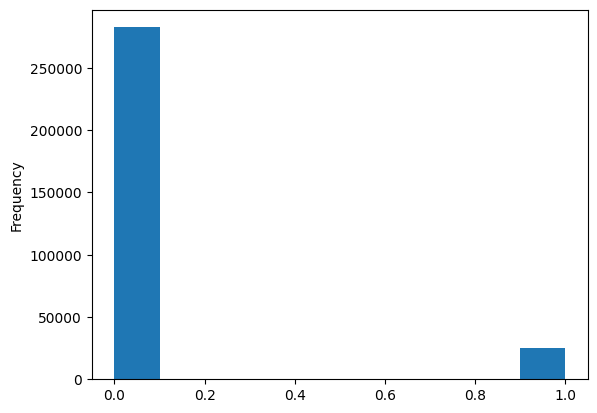

In [ ]:
application_train['TARGET'].astype(int).plot.hist();

--> Imbalanced class problem -->
repaid loans >>> not repaid loans

later on we will reflect this inbalance

In [ ]:
#we have loades the data about application(test+train)

#We gonna split them in 2 subsets

# Training Set: This is the portion of the dataset that
# is used to train the machine learning model.
# The model learns patterns from  this data.


# Test Set: This subset is used to evaluate the model's performance
# after training. It allows you to check if the model is able to generalize
# well to unseen data. The test set should not be used during model training,
# ensuring an unbiased evaluation.



X=application_train.drop('TARGET',axis=1)
y=application_train['TARGET']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101,stratify = y)

#stratify=y: This argument ensures that the target variable's distribution
# is preserved across both the training and testing sets.

#Without it, you might get inconsistent results that are difficult to interpret
# or compare ensuring that these random processes produce the same result every
# time you run the code

In [ ]:
# Splitting Data into Numerical and Categorical Columns

numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

In [ ]:
print(numerical_cols)
print(categorical_cols)

Index(['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=105)
Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')


In [ ]:
# Pipeline: A pipeline allows you to chain together multiple data processing steps in a linear sequence, ensuring that each step is applied in order.
# It helps to keep your code clean and reusable.

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numerical_transformer= Pipeline(
    steps=[
        (
            'imputer', SimpleImputer(strategy='mean')
            #SimpleImputer: This is used to fill in missing values in your dataset.
            # Here, it's set to replace missing values with the mean of each numerical feature.
            #This is useful for handling missing data.
        ),
        (
            'scaler', StandardScaler()
            #StandardScaler: This standardizes the numerical features by removing
            #the mean and scaling to unit variance.
            #This is a common step to normalize numerical data, especially before
            #applying machine learning algorithms that are sensitive to feature scale
            #(e.g., logistic regression, support vector machines).
        )
    ]
)


#steps: This is a list of steps in the pipeline. Each step is a tuple consisting of:
# A name (e.g., 'imputer', 'scaler').
# A transformer or model (e.g., SimpleImputer, StandardScaler).





In [ ]:
categorical_transformer=Pipeline(
    steps=[
        (
            'imputer', SimpleImputer(strategy='most_frequent')
            #SimpleImputer: For categorical features, missing values
            #are replaced with the most frequent value in the column.
        ),
        (
            'onehot', OneHotEncoder(handle_unknown='ignore')
            #OneHotEncoder: This encodes categorical variables into binary columns
            #(e.g., if a feature has three categories: A, B, and C, it will create three new columns, one for each category, with 1s and 0s).

            #handle_unknown='ignore': This argument ensures that if a category is encountered in the test
            #data that wasn't present in the training data, it will be ignored rather than throwing an error.
        )
    ]
)

In [ ]:
# ColumnTransformer() : It ensures that the appropriate transformations are applied to each column based on its data type.

preprocessor= ColumnTransformer(
    transformers=[
        (
            'num',numerical_transformer,numerical_cols
            #This specifies that the numerical_transformer pipeline should be applied to the columns listed in numerical_cols.
        ),
        (
            'cat',categorical_transformer,categorical_cols
            #Similarly, the categorical_transformer pipeline is applied to the columns listed in categorical_cols.

        )
    ]
)

In [ ]:
# Defining Pipeline

#The Pipeline in scikit-learn is a tool used to streamline multiple steps of preprocessing and modeling
#into a single object. It allows you to chain together multiple steps, making your workflow cleaner and easier to manage.
#Each step in the pipeline must be a transformer or an estimator (a model).

pipeline=Pipeline(
    steps=[
        (
            'preprocessor',preprocessor
        ),
        (
            'classifier', RandomForestClassifier(n_estimators=200, random_state=10,verbose=1,n_jobs=-1)
        )
    ]
)

#Classification: The label is a binary variable, 0 (will repay loan on time), 1 (will have difficulty repaying loan)

In [ ]:
# Fitting and Evaluating the Logistic Regression Model

pipeline.fit(X_train,y_train)

train_score=pipeline.score(X_train,y_train)
test_score=pipeline.score(X_test,y_test)

print('Train Score:',train_score)
print('Test Score:',test_score)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   58.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  4.1min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    3.2s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   15.7s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:   15.9s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.8s


Train Score: 1.0
Test Score: 0.9192722306228964


[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    3.5s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    3.5s finished
